(machine_learning_basics.scaling=)
# 缩放
在使用机器学习算法处理数据时，参数的范围至关重要。为了使不同参数处于相同范围，可能需要进行缩放。

另请参阅
* [使用scikit-learn进行标准化](https://scikit-learn.org/stable/modules/preprocessing.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# local import; this library is located in the same folder as the notebook
from data_generator import generate_biomodal_2d_data

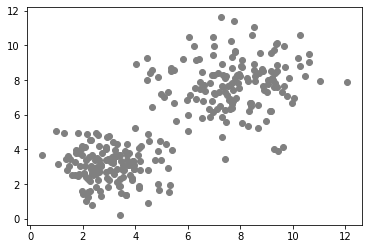

In [2]:
data1 = generate_biomodal_2d_data()

plt.scatter(data1[:, 0], data1[:, 1], c='grey')

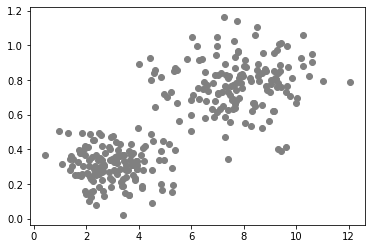

In [3]:
data2 = generate_biomodal_2d_data()
data2[:, 1] = data2[:, 1] * 0.1

plt.scatter(data2[:, 0], data2[:, 1], c='grey')

## 对不同范围的数据进行聚类
现在我们将使用[k-均值聚类](https://en.wikipedia.org/wiki/K-means_clustering)对这两个_看似相似_的数据集进行聚类。这种效果在使用其他算法时也可以观察到。为了确保我们对两个数据集应用相同的算法并使用相同的配置，我们将其封装成一个函数并重复使用。

In [4]:
def classify_and_plot(data):
    number_of_classes = 2
    classifier = KMeans(n_clusters=number_of_classes)
    classifier.fit(data)
    prediction = classifier.predict(data)

    colors = ['orange', 'blue']
    predicted_colors = [colors[i] for i in prediction]

    plt.scatter(data[:, 0], data[:, 1], c=predicted_colors)

当对两个数据集应用相同的方法时，我们可以观察到中心的数据点被不同地分类。这两个数据集之间的唯一区别是它们的数据范围。数据点在一个轴上的缩放不同。

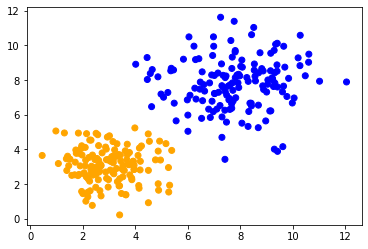

In [5]:
classify_and_plot(data1)

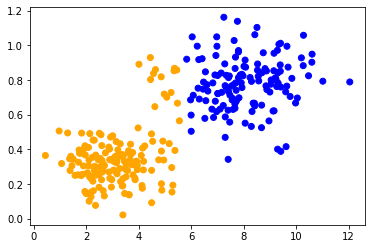

In [6]:
classify_and_plot(data2)

## 标准缩放
[标准缩放](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)是一种将数据范围改变为固定范围的技术，例如`[0, 1]`。它允许在处理原本处于不同范围的数据时获得相同的结果。

In [7]:
def scale(data):
    scaler = StandardScaler().fit(data)
    return scaler.transform(data)

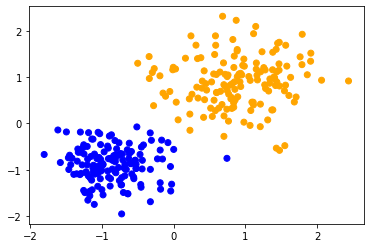

In [8]:
scaled_data1 = scale(data1)

classify_and_plot(scaled_data1)

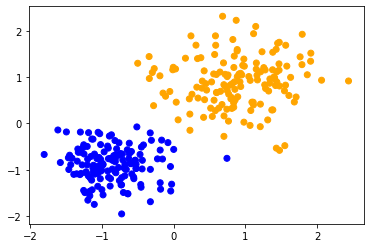

In [9]:
scaled_data2 = scale(data2)

classify_and_plot(scaled_data2)